# Mały projekt 3: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.




Aleksandra Pawłowska - part 1 and part 4 of the project

Max Stróżyk - part 2 and part 3 of the project

In [1]:
# general packages 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

# functions scripts
from scripts.load_data import * 
from scripts.analyse_data import *

# paths
PATH_DATA = Path('data') 


In [2]:
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"

gios_url_ids = {
    2015: "236", 
    2018: "603",
    2021: "486",
    2024: "582"
}
gios_pm25_file = {
    2015: "2015_PM25_1g.xlsx",
    2018: "2018_PM25_1g.xlsx",
    2021: "2021_PM25_1g.xlsx",
    2024: "2024_PM25_1g.xlsx"
}


In [3]:
df2015_raw = download_gios_archive(2015, gios_url_ids[2015], gios_pm25_file[2015])
df2018_raw = download_gios_archive(2018, gios_url_ids[2018], gios_pm25_file[2018])
df2021_raw = download_gios_archive(2021, gios_url_ids[2021], gios_pm25_file[2021])
df2024_raw = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

In [4]:
df2015 = clean_gios_data2(df2015_raw)
df2018 = clean_gios_data2(df2018_raw)
df2021 = clean_gios_data2(df2021_raw)
df2024 = clean_gios_data2(df2024_raw)

/home/dominika/ztp/final_fork/scripts/load_data.py:83: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Data"] = pd.to_datetime(df["Data"], errors="coerce")
/home/dominika/ztp/final_fork/scripts/load_data.py:83: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Data"] = pd.to_datetime(df["Data"], errors="coerce")


In [5]:
num_stations_2015 = df2015.shape[1] 
num_stations_2018 = df2018.shape[1]  
num_stations_2021 = df2021.shape[1]
num_stations_2024 = df2024.shape[1]
unique_days_shifted = df2015.index.normalize().unique()

num_days_2015 = len(pd.unique(unique_days_shifted))
num_days_2018 = len(pd.unique(df2018.index.date))
num_days_2021 = len(pd.unique(df2021.index.date))
num_days_2024 = len(pd.unique(df2024.index.date))

print(f"Number of days in 2015: {num_days_2015}")
print(f"Number of days in 2018: {num_days_2018}")
print(f"Number of days in 2021: {num_days_2021}")
print(f"Number of days in 2024: {num_days_2024}")

print(f"\nNumber of stations in 2015: {num_stations_2015}")
print(f"Number of stations in 2018: {num_stations_2018}")
print(f"Number of stations in 2021: {num_stations_2021}")
print(f"Number of stations in 2024: {num_stations_2024}")



Number of days in 2015: 365
Number of days in 2018: 365
Number of days in 2021: 365
Number of days in 2024: 366

Number of stations in 2015: 42
Number of stations in 2018: 51
Number of stations in 2021: 88
Number of stations in 2024: 96


In [6]:
# Finding common stations
df2015 = clean_column_names(df2015)
df2018 = clean_column_names(df2018)
df2021 = clean_column_names(df2021)
df2024 = clean_column_names(df2024)

print(df2015.columns[:10] + "\n")
print(df2018.columns[:10] + "\n")
print(df2021.columns[:10] + "\n")
print(df2024.columns[:10] + "\n")

mapping = map_old_to_new_codes()
df2015.rename(columns=mapping, inplace=True)
df2018.rename(columns=mapping, inplace=True)
df2021.rename(columns=mapping, inplace=True)
df2024.rename(columns=mapping, inplace=True)

Index(['DsJelGorOgin\n', 'DsWrocAlWisn\n', 'DsWrocWybCon\n', 'KpBydPlPozna\n',
       'KpBydWarszaw\n', 'KpToruDziewu\n', 'LbLubObywate\n', 'LdLodzCzerni\n',
       'LdLodzGdansk\n', 'LdZgieMielcz\n'],
      dtype='object', name=0)
Index(['DsJelGorOgin\n', 'DsWrocAlWisn\n', 'DsWrocWybCon\n', 'KpBydPlPozna\n',
       'KpBydWarszaw\n', 'KpToruDziewu\n', 'KpWloclOkrze\n', 'LbLubObywate\n',
       'LdLodzCzerni\n', 'LdLodzGdansk\n'],
      dtype='object', name=1)
Index(['DsJelGorOgin\n', 'DsKlodzSzkol\n', 'DsMiliczMOB\n', 'DsSrodaSlMOB\n',
       'DsWrocAlWisn\n', 'DsWrocWybCon\n', 'KpBydPlPozna\n', 'KpBydWarszaw\n',
       'KpNaklWawrzy\n', 'KpSolecRowecMOB\n'],
      dtype='object', name=1)
Index(['DsChojnowMalMOB\n', 'DsJelGorOgin\n', 'DsKlodzSzkol\n',
       'DsKudowaSzkoMOB\n', 'DsWrocAlWisn\n', 'DsWrocWybCon\n',
       'KpBydPlPozna\n', 'KpBydWarszaw\n', 'KpNaklWawrzy\n',
       'KpSwiecJPawlMOB\n'],
      dtype='object', name=1)


In [6]:
# Finding common stations
common_stations = list(set(df2015.columns) & set(df2018.columns) & set(df2021.columns) & set(df2024.columns))
print(f"Liczba wspólnych stacji: {len(common_stations)}")

df2015 = df2015[common_stations]
df2018 = df2018[common_stations]
df2021 = df2021[common_stations]
df2024 = df2024[common_stations]

Liczba wspólnych stacji: 25


`Managing NA values`

We did not use `fill_na` function because it led to lack of data in examined stations. To do it properly we would create clusters of stations based on similiar densities of *PM2.5* in different years, then we would fill out missing values by averaging month values in other stations in the same cluster. 

In [7]:
file_name = "PM25_combined_2015_2018_2021_2024.csv"

# combining data
combined = pd.concat([df2015, df2018, df2021, df2024]).sort_index()
combined = combined.dropna(how="all")

combined.index = pd.to_datetime(combined.index)
combined = combined.sort_index()

print(combined.shape)
print(f"\nCombined df starts on: \n{combined.index.min()} \nand ends on: \n{combined.index.max()}")
# combined = fill_na(combined)
combined.to_csv(PATH_DATA / file_name, index=True, date_format="%Y-%m-%d %H:%M:%S")

df = combined

(35064, 25)

Combined df starts on: 
2015-01-01 00:00:00.110000 
and ends on: 
2024-12-31 23:00:00


# Parts 2 and 3

## Results 
From regression plot `Mean PM2.5 concentration in ['Warszawa', 'Katowice']` we can see a significant reduction in PM2.5 concentrations, especially during the heating season.

In the heatmaps, the minimum value was set to $10,\mu\mathrm{g/m^3}$ because this is the target annual limit that EU countries are expected to meet by 2030 [1]. The plots show that the analysed cities do not yet meet this criterion, and the exceedances are particularly high in cities located in the southern part of Poland.

## Analysis
**Limits**

For 2020, the required annual limit for PM2.5 was set at $20,\mu\mathrm{g/m^3}$ [2]. Based on the `heatmaps`, most cities appear to have reached this limit by 2024.

**Reduction**

The most substantial reductions occur during the heating seasons. This is because one of the main sources of PM2.5 in Poland is the combustion of solid fuels in low-quality stoves and old boilers. In recent years many of these have been replaced or phased out, which directly contributes to the observed decline in PM2.5 concentrations [3].


# Bibliography:

[1] [Progress and policies to achieve the zero pollution action plan and EU 2024/2881 PM2.5 targets in Northern Italy](https://www.nature.com/articles/s41598-025-17176-x)

[2] [Poziomy dopuszczalne zanieczyszczeń w powietrzu ze względu na ochronę zdrowia ludzi i ochronę roślin, terminy ich osiągnięcia oraz okresy, dla których uśrednia się wyniki pomiarów - gios.gov.pl](https://powietrze.gios.gov.pl/pjp/content/annual_assessment_air_acceptable_level)

[3] [Dbamy o jakość powietrza w Polsce. Wprowadzamy zmiany w wymaganiach jakościowych dla paliw stałych [ROZPORZĄDZENIE] - gov.pl](https://www.gov.pl/web/klimat/dbamy-o-jakosc-powietrza-w-polsce-wprowadzamy-zmiany-w-wymaganiach-jakosciowych-dla-paliw-stalych-rozporzadzenie)

Part  2

In [8]:
# part with mean values 
time_to_month(df) 

,SlKatoKossut,LdLodzCzerni,WpKaliSawick,LdZgieMielcz,PkPrzemGrunw,KpBydPlPozna,LuZielKrotka,MpKrakBulwar,DsJelGorOgin,MpKrakAlKras,...,MzWarAlNiepo,WmOlsPuszkin,SlZlotPotLes,DsWrocWybCon,MzRadTochter,MzWarWokalna,LbLubObywate,KpBydWarszaw,MzLegZegrzyn,MzSiedKonars
Data,,,,,,,,,,,,,,,,,,,,,
2015-01-01,31.247839,27.279348,32.039886,26.402375,26.429636,21.016268,25.087498,36.965099,24.504821,46.291156,...,26.079207,24.267375,20.490547,27.863459,38.148750,23.820244,26.493200,25.890511,34.321645,23.891594
2015-02-01,56.355432,41.245764,48.900846,44.475336,41.343068,45.497710,36.030131,59.241489,41.859821,74.529224,...,45.497944,39.770500,36.671320,42.238897,60.714142,43.573281,55.702503,49.939606,62.339970,44.468838
2015-03-01,39.389542,30.667972,41.674071,35.808276,41.525408,33.105139,30.291795,44.038636,28.603600,57.085309,...,35.315251,29.642556,24.287572,32.581978,41.123270,32.851293,43.421745,24.413016,56.189266,36.035519
2015-04-01,23.598871,15.336890,24.054884,16.491453,15.119868,16.357370,15.575828,22.218923,12.323373,34.743410,...,18.580643,13.321504,13.962515,15.131175,20.466768,15.601419,20.120187,NaN,23.671014,14.500086
2015-05-01,18.055464,12.292181,19.572950,10.081744,14.765689,12.793215,13.638301,18.646480,8.716385,26.696521,...,17.466389,11.356201,11.586400,13.339719,15.448248,14.854559,15.940160,12.668022,19.361711,14.827582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,11.948790,9.851478,12.873387,10.932571,12.971640,9.209726,13.275719,12.918683,9.372581,12.731565,...,11.624059,11.946774,11.338575,13.286649,11.917204,8.542896,12.916667,9.179772,9.005376,NaN
2024-09-01,13.956111,13.984844,17.357799,14.973056,15.655602,12.913372,19.249787,14.665833,11.491155,15.278442,...,16.260000,15.639441,13.546314,15.856825,15.653652,12.797986,18.224930,13.917500,13.684167,NaN
2024-10-01,16.799194,16.039838,19.584005,22.542396,17.301344,13.104191,16.264714,16.725403,13.677898,17.136022,...,16.553297,14.791233,13.939651,17.468817,17.613525,14.474684,21.482162,17.466622,16.339300,NaN


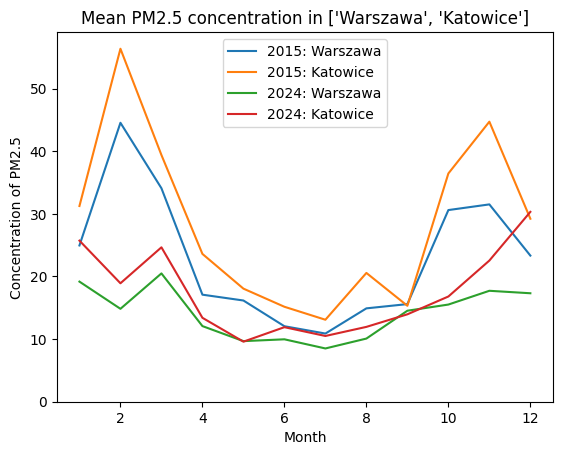

In [10]:
# plot of PM2.5 concentration 
cities = ['Warszawa', 'Katowice']
years = [2015, 2024]
years_trend_cities(df, cities=cities, years=years)

Part 3

There is 25


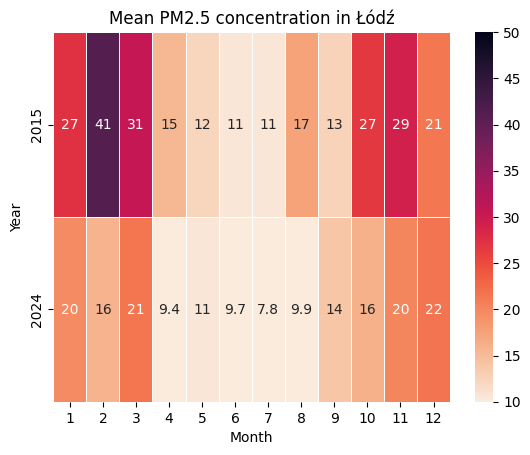

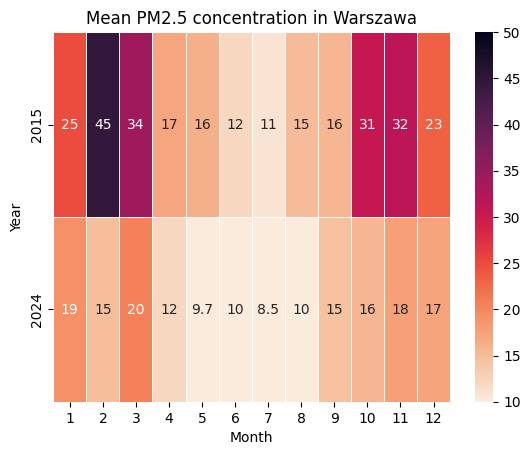

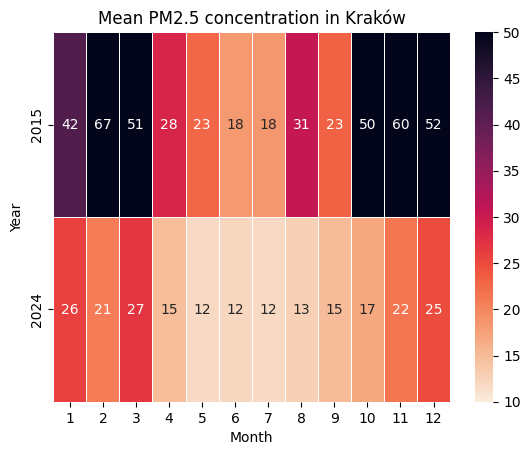

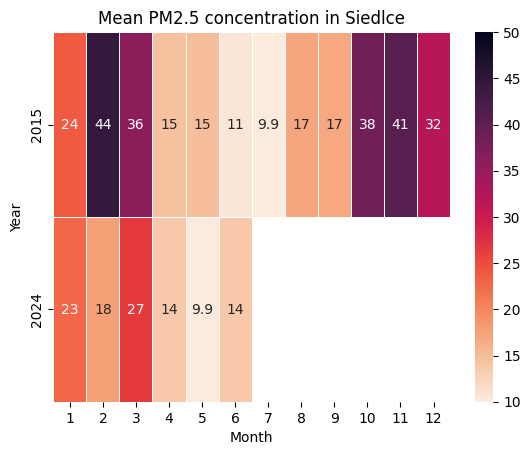

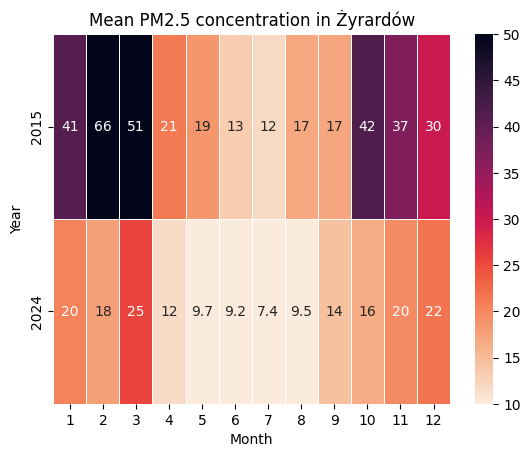

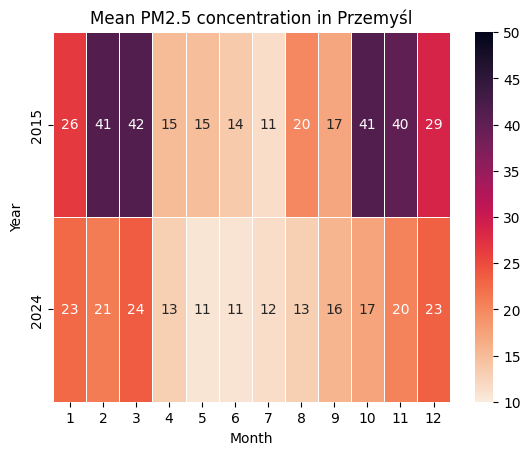

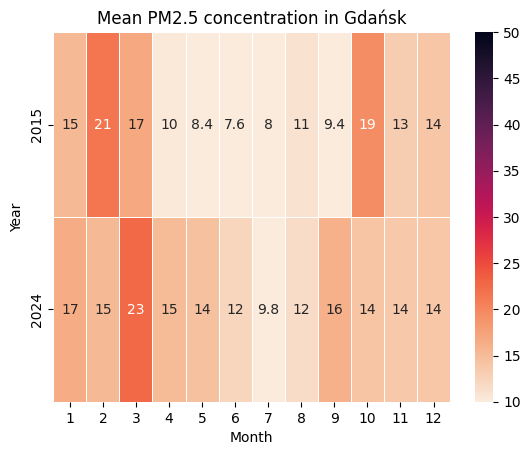

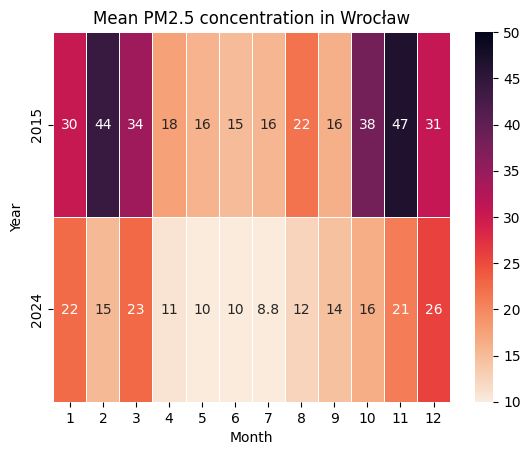

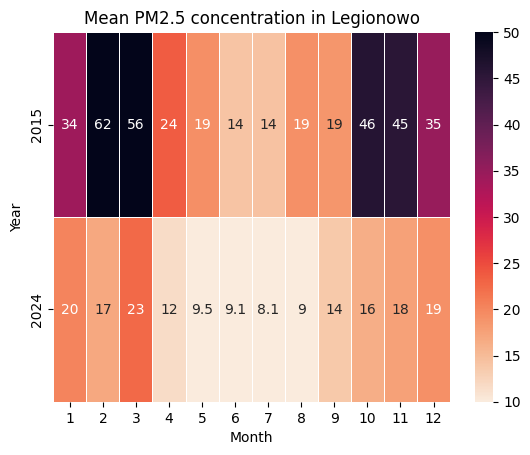

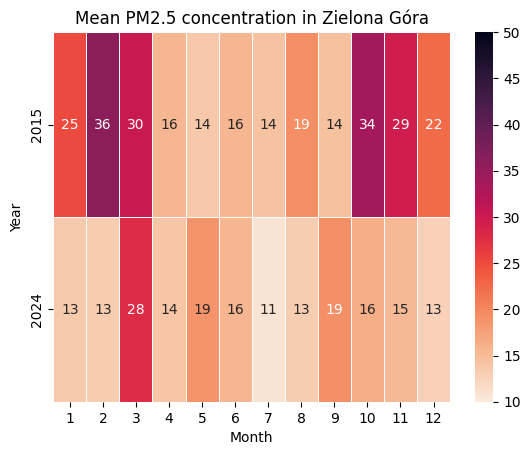

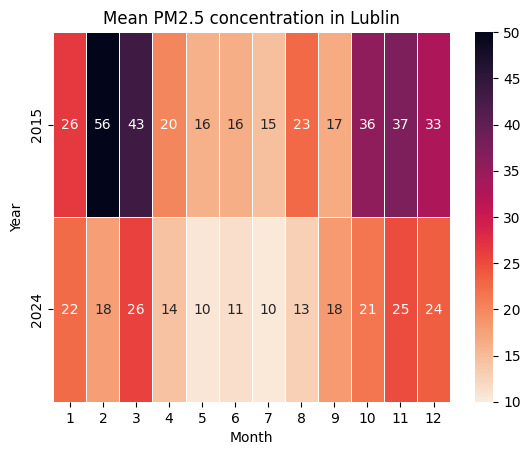

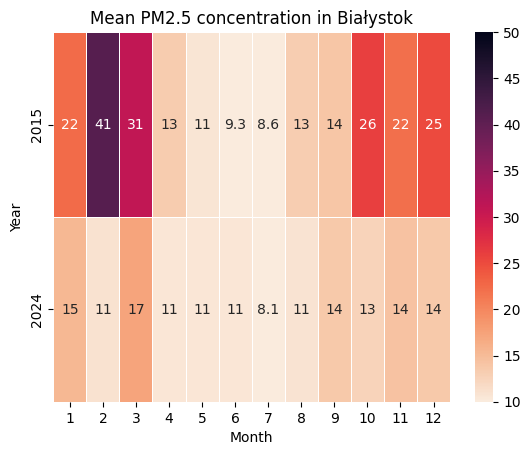

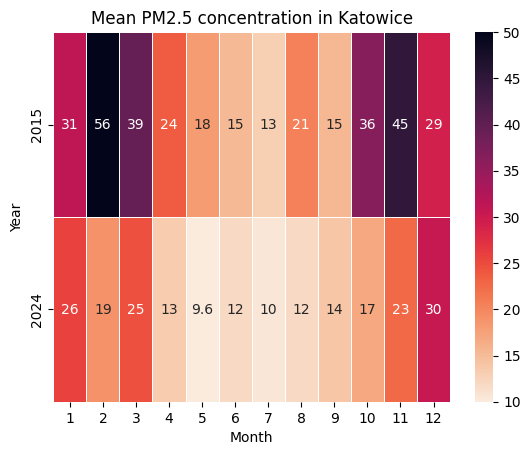

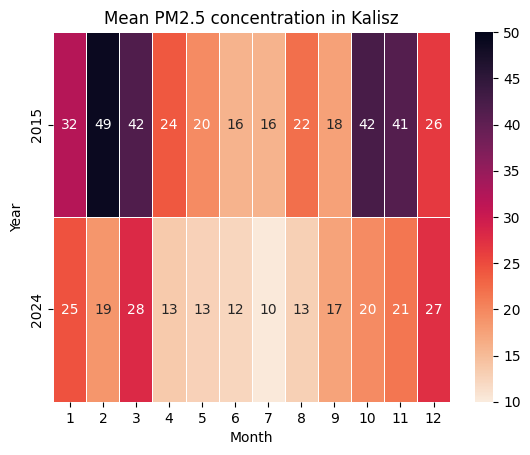

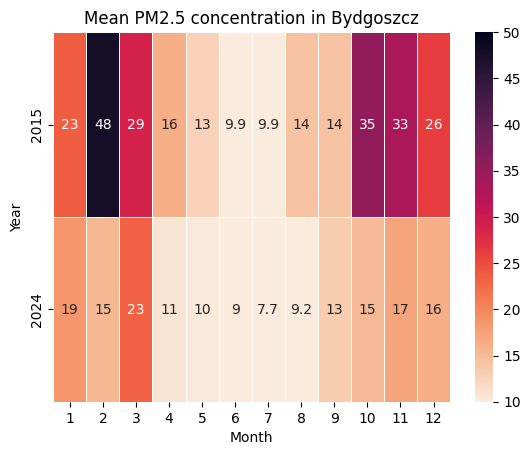

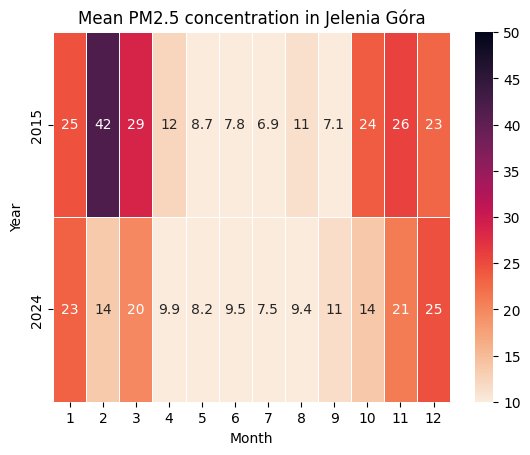

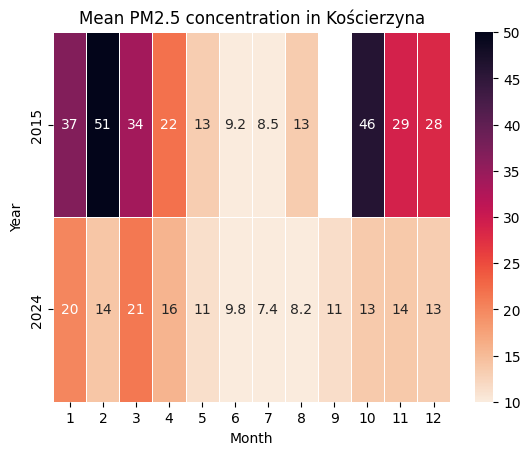

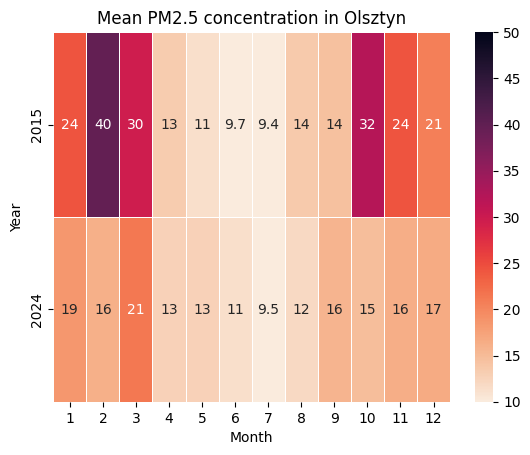

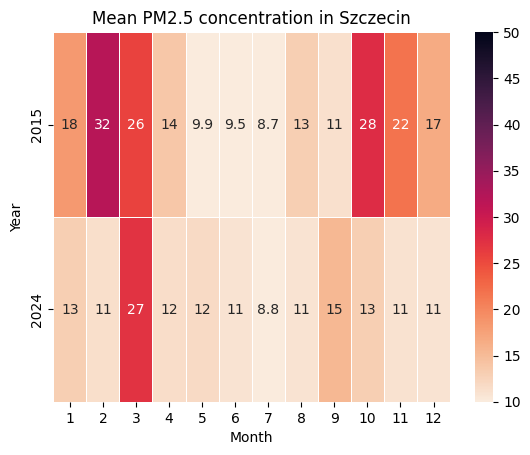

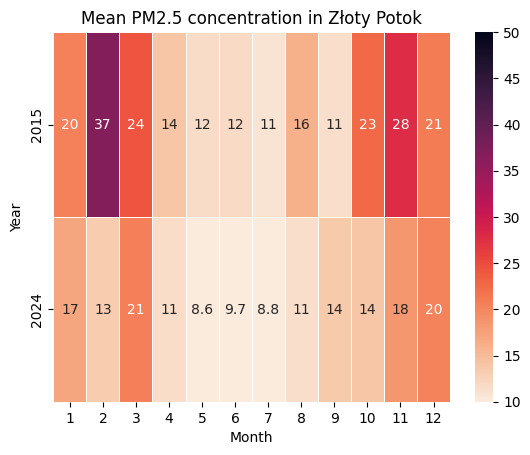

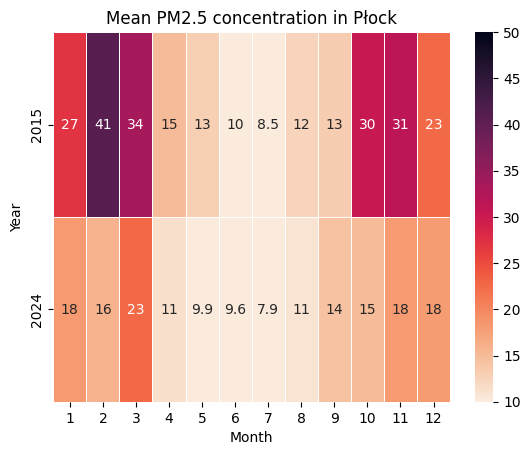

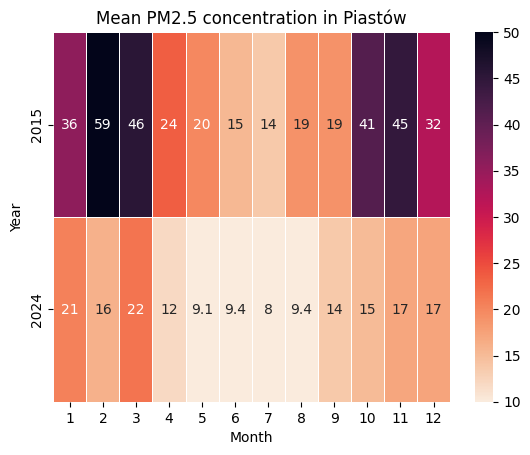

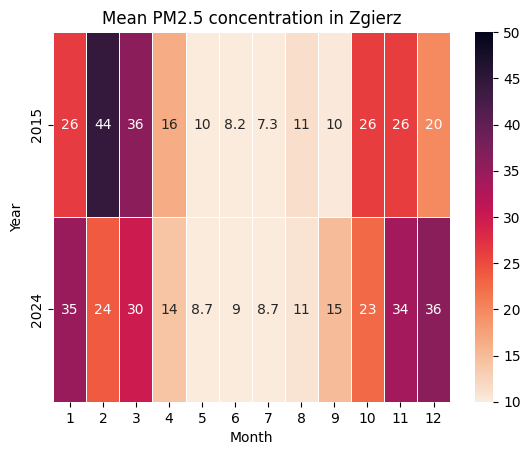

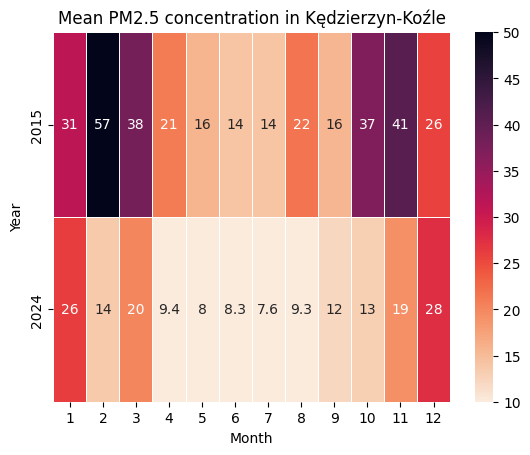

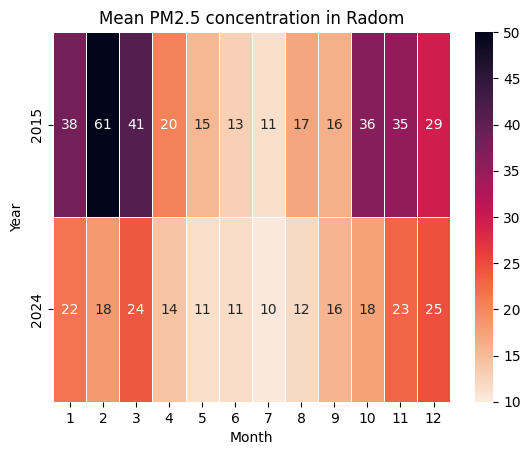

In [11]:
cities = ['Warszawa', 'Katowice']
years = [2015, 2024]
years_heatmaps_cities(df, cities='all', years=years)

Part 4



In [12]:
daily_mean = 15 

exc2024, total2024 = get_daily_exceedances(df2024, daily_mean)
exc2021, total2021 = get_daily_exceedances(df2021, daily_mean)
exc2018, total2018 = get_daily_exceedances(df2018, daily_mean)
exc2015, total2015 = get_daily_exceedances(df2015, daily_mean)

In [13]:
print("=== 2024 ===")
top3_2024, bottom3_2024 = top3_bottom3_exceedances(exc2024)

print("\n=== 2021 ===")
top3_2021, bottom3_2021 = top3_bottom3_exceedances(exc2021)

print("\n=== 2018 ===")
top3_2018, bottom3_2018 = top3_bottom3_exceedances(exc2018)

print("\n=== 2015 ===")
top3_2015, bottom3_2015 = top3_bottom3_exceedances(exc2015)

=== 2024 ===
Top 3 stations with the most exceedance days:
  LdZgieMielcz: 189
  MpKrakAlKras: 178
  LbLubObywate: 170

Bottom 3 stations with the fewest exceedance days:
  ZpSzczAndrze: 72
  PdBialUpalna: 76
  MzSiedKonars: 79

=== 2021 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 250
  LbLubObywate: 246
  MzWarAlNiepo: 224

Bottom 3 stations with the fewest exceedance days:
  LuZielKrotka: 92
  ZpSzczAndrze: 95
  ZpSzczPilsud: 117

=== 2018 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 343
  SlKatoKossut: 285
  OpKKozBSmial: 281

Bottom 3 stations with the fewest exceedance days:
  ZpSzczAndrze: 106
  PdBialUpalna: 135
  PmKosTargowa: 143

=== 2015 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 344
  DsWrocAlWisn: 308
  MzPiasPulask: 297

Bottom 3 stations with the fewest exceedance days:
  PmGdaLeczkow: 97
  ZpSzczAndrze: 113
  DsJelGorOgin: 144


In [14]:
selected_stations = list(top3_2024.index) + list(bottom3_2024.index)
plot_df = pd.DataFrame({
    "2015": exc2015[selected_stations],
    "2018": exc2018[selected_stations],
    "2021": exc2021[selected_stations],
    "2024": exc2024[selected_stations]
})

plot_df = plot_df.T 
plot_df

,LdZgieMielcz,MpKrakAlKras,LbLubObywate,ZpSzczAndrze,PdBialUpalna,MzSiedKonars
2015,175,344,276,113,158,229
2018,251,343,234,106,135,205
2021,201,250,246,95,137,177
2024,189,178,170,72,76,79


<Figure size 1200x600 with 0 Axes>

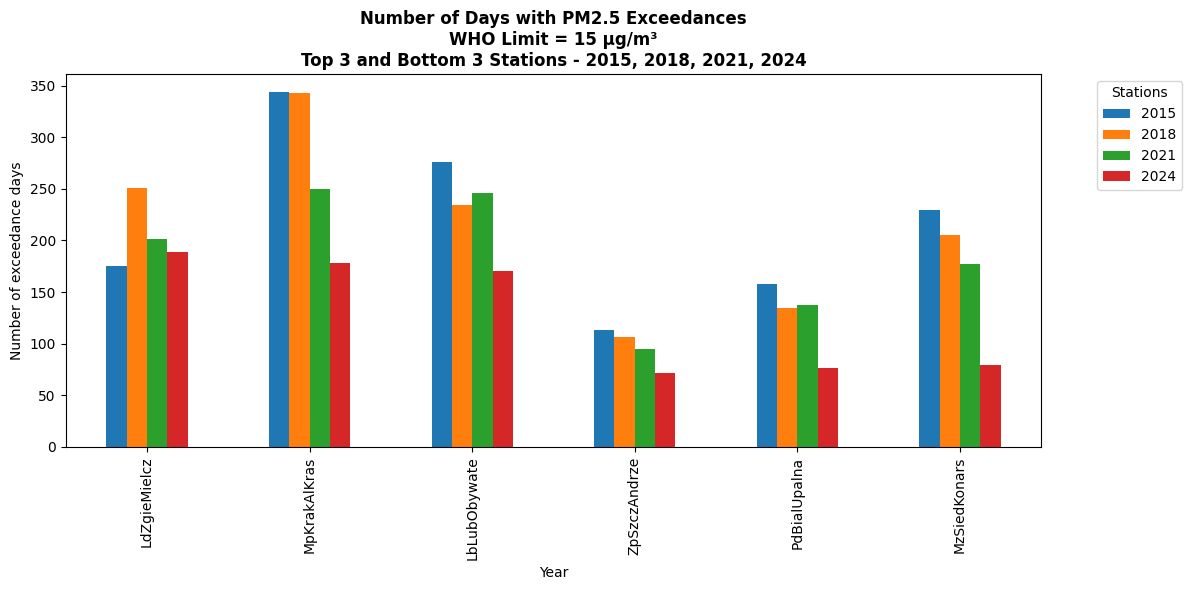

In [15]:
plt.figure(figsize=(12,6))
plot_df.T.plot(kind="bar", figsize=(12,6))

plt.title(
    "Number of Days with PM2.5 Exceedances\nWHO Limit = 15 µg/m³\nTop 3 and Bottom 3 Stations - 2015, 2018, 2021, 2024",
    fontsize=12,
    fontweight='bold'
)
plt.xlabel("Year")
plt.ylabel("Number of exceedance days")
plt.legend(title="Stations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conclusions and interpretation of results

The analysis of the number of days exceeding the WHO daily guideline for PM2.5 (15 µg/m³) reveals clear spatial and temporal differences between monitoring stations. In 2024, the highest number of exceedance days was recorded at LdZgieMielcz, MpKrakAlKras, and LbLubObywate, indicating a persistent air quality problem in large urban areas and regions strongly influenced by traffic emissions and residential heating. These locations are typically characterized by high population density and intensive anthropogenic activity, which contributes to elevated particulate matter concentrations.

In contrast, the lowest number of exceedance days in 2024 was observed at ZpSzczAndrze, PdBialUpalna, and MzSiedKonars. These stations are likely situated in areas with more favorable meteorological conditions, better air circulation, and a lower intensity of local emission sources, resulting in comparatively cleaner air throughout the year.

A comparison across the years 2015, 2018, 2021, and 2024 shows a clear downward trend in the number of days exceeding the PM2.5 limit at all analyzed stations, with the most pronounced improvement occurring after 2018. The greatest reductions were observed at stations that previously recorded extremely high exceedance counts, such as MpKrakAlKras. This improvement may be attributed to the implementation of anti-smog policies, the replacement of outdated heating systems, increased environmental awareness, and stricter air quality regulations. Nevertheless, despite this positive trend, the number of exceedance days in 2024 remains relatively high, indicating that PM2.5 pollution continues to pose a significant environmental and public health challenge and that further mitigation measures are still necessary.

# Part 5

In [9]:
who_norm = 15

#creating a mapping
url_do_metadanych= "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/622"
mapa_woj = pobierz_i_stworz_mapowanie_woj(url_do_metadanych)
df_woj = mapuj_wojewodztwo(df, mapa_woj)


#Starting with a df with already mapped old station codes, with hourly data 
#and shifted midnight measurements (00:00) to the previous day.


#grouping by voivodeship, mean aggregating
df_grouped_voi = df_woj.groupby(df_woj.columns, axis=1).mean()

#getting the number of exceedences every year
df_all_years = sumuj_dni_z_przekroczeniem(df_grouped_voi, who_norm)

df_all_years

/tmp/ipykernel_6987/3539913324.py:14: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_grouped_voi = df_woj.groupby(df_woj.columns, axis=1).mean()


,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBELSKIE,LUBUSKIE,MAZOWIECKIE,MAŁOPOLSKIE,OPOLSKIE,PODKARPACKIE,WARMIŃSKO-MAZURSKIE,WIELKOPOLSKIE,ŁÓDZKIE,ŚLĄSKIE
rok,,,,,,,,,,,,
2015,216,192,276,225,247,325,265,238,180,268,184,231
2018,211,235,234,144,232,313,281,225,190,197,236,259
2021,179,120,246,92,185,237,178,180,130,209,189,197
2024,127,117,170,145,138,164,111,146,139,163,170,144


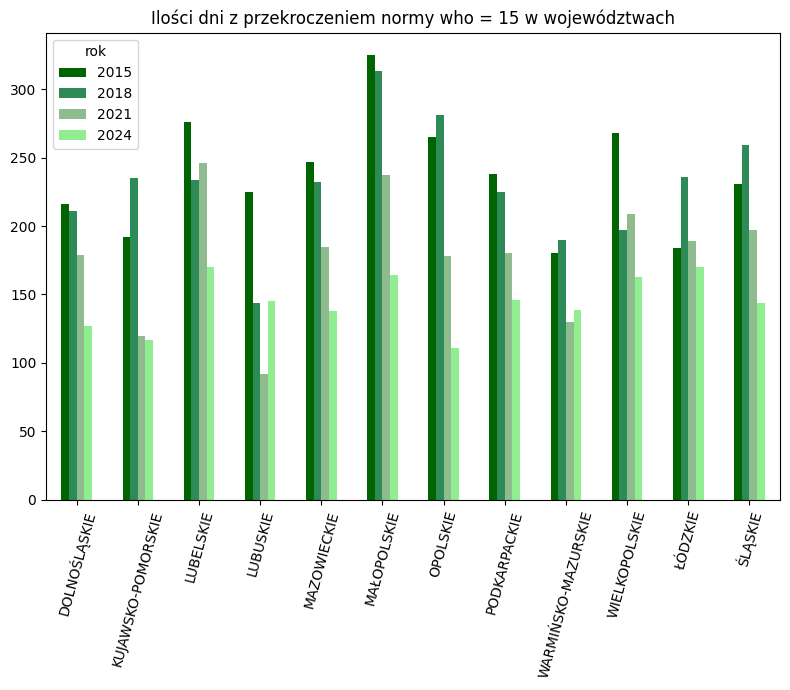

In [10]:
barplot_voivodeship(df_all_years, who_norm)

# Interpretation

With only the first 2 years being taken into concidieration, the studied amounts were declining in most (8) of the voivodeships. Considering the rest, in 4 out of 7 provinces, the increase was relatively small, the remaining 3 (Kujawsko-pomorskie, Łódzkie and Śląskie) show a relatively large increase. During the first 2 years, Małopolskie's had the most exceedences. 

In the last 2 years of the study, the change is visible and positive. Out of 15 in the treatment group, only 2 (Lubuskie's large and Warmińsko-Mazurkie's little increase) voivodeships' shifts were negative in terms of air quality. Małopolskie's score's decreased hugely, from 237 in 2021 to 167 days in 2024.

Overall, the changes are visibly for the better. The amount of days with exceedences is generally decreasing. In every single voivodeship, the amount of exceedences was way lower in 2024 than it had been in 2015. 

This change may be due to the efforts to become more ecologically sustainable being made.